Time Series Analysis and Forecasting of {ticker} Stock Prices

---



In [1]:
# Install dependencies
!pip install yfinance statsmodels tensorflow pmdarima -q  # Quiet install to reduce output

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import yfinance as yf
from datetime import datetime
import warnings
import time  # For adding delays between plots
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Function to download and prepare stock data with error handling and ticker validation
def get_stock_data(ticker, start_date, end_date, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            # Try common variations for Alphabet (GOOGL or GOOG if GOOGLE was intended)
            valid_tickers = [ticker]
            if ticker.upper() == 'GOOGLE':
                valid_tickers = ['GOOGL', 'GOOG']  # Try Class A and Class C shares

            for t in valid_tickers:
                print(f"Trying ticker: {t}")
                stock = yf.download(t, start=start_date, end=end_date, auto_adjust=True)
                if not stock.empty:
                    print(f"Successfully downloaded data for {t}")
                    return stock[['Close', 'Open', 'High', 'Low', 'Volume']]
                else:
                    print(f"No data found for {t}, trying next variation or retrying...")

            # If no valid ticker found, raise an error or continue with a fallback
            raise ValueError(f"No data found for ticker {ticker} or its variations. Symbol may be delisted or invalid.")
        except Exception as e:
            retries += 1
            if retries < max_retries:
                print(f"Retry {retries}/{max_retries} due to error: {e}")
                time.sleep(5)  # Wait before retrying to avoid rate limiting
            else:
                print(f"Max retries reached. Error downloading data: {e}")
                return None

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles
plt.style.use('ggplot')  # Change to other styles if needed
sns.set_theme(style="darkgrid", palette="muted")

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Trying ticker: GOOGl


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GOOGl
Columns in dataset: MultiIndex([( 'Close', 'GOOGL'),
            (  'Open', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])



=== Exploratory Data Analysis ===


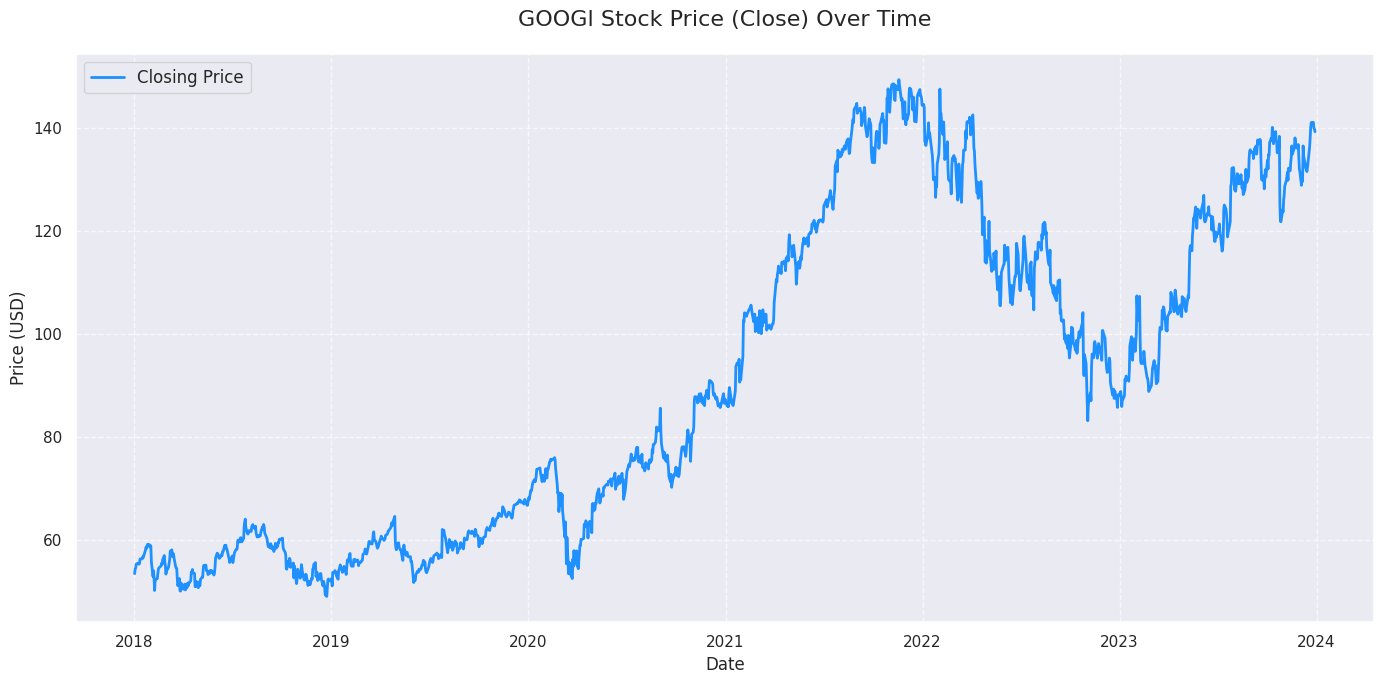


Descriptive Statistics for Closing Price:

Ticker        GOOGL
count   1509.000000
mean      90.862431
std       31.235255
min       49.055672
25%       60.003487
50%       87.702065
75%      119.267647
max      149.297287




Missing Values in Dataset:

Price   Ticker
Close   GOOGL     0
Open    GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Volume  GOOGL     0
dtype: int64



=== Price Distribution ===


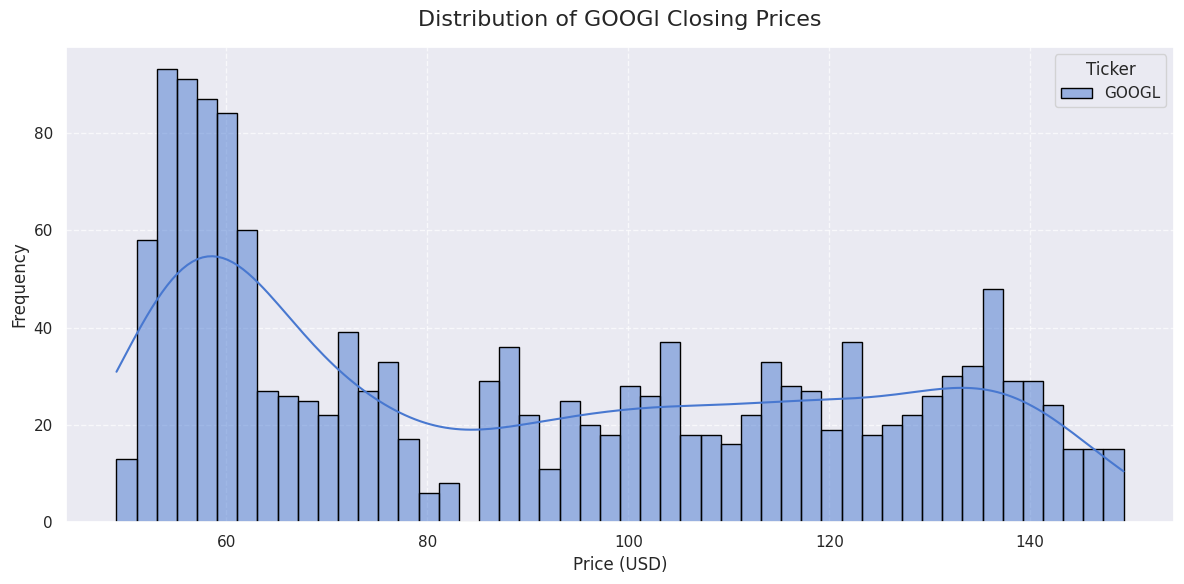

=== Differenced Price for Stationarity ===


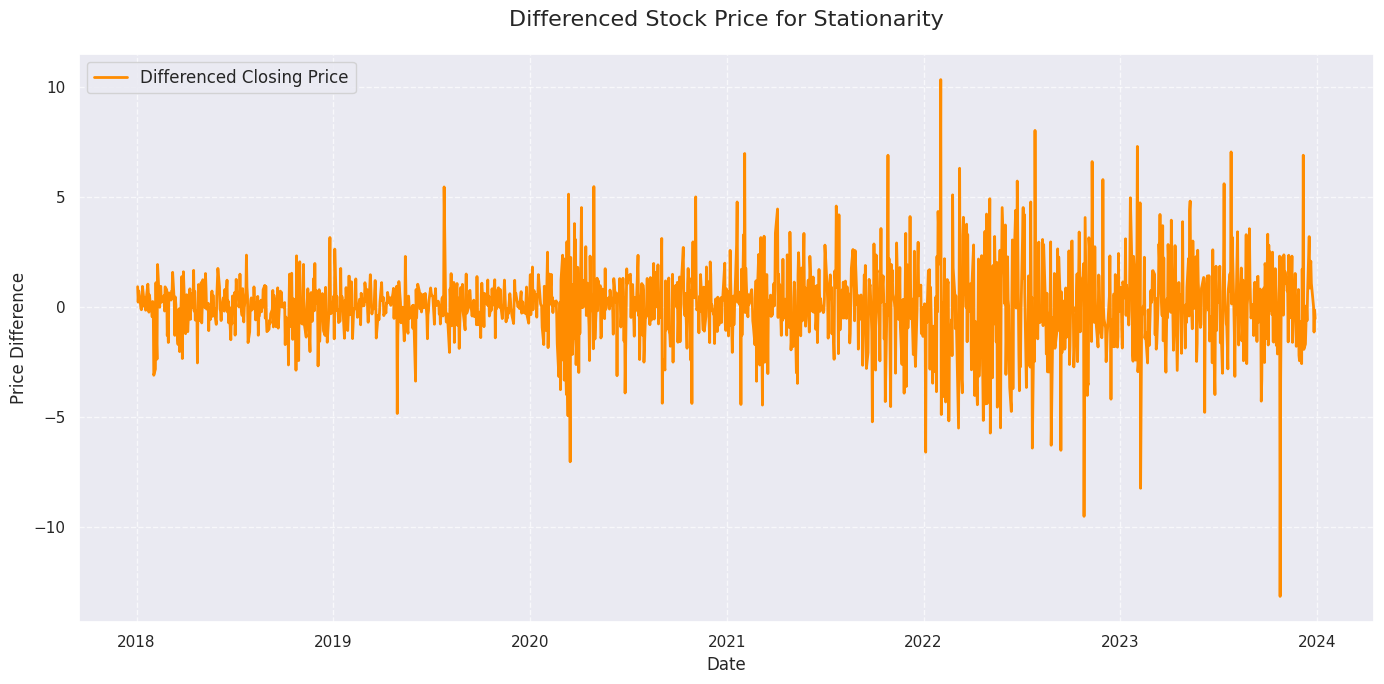

=== Autocorrelation and Partial Autocorrelation ===


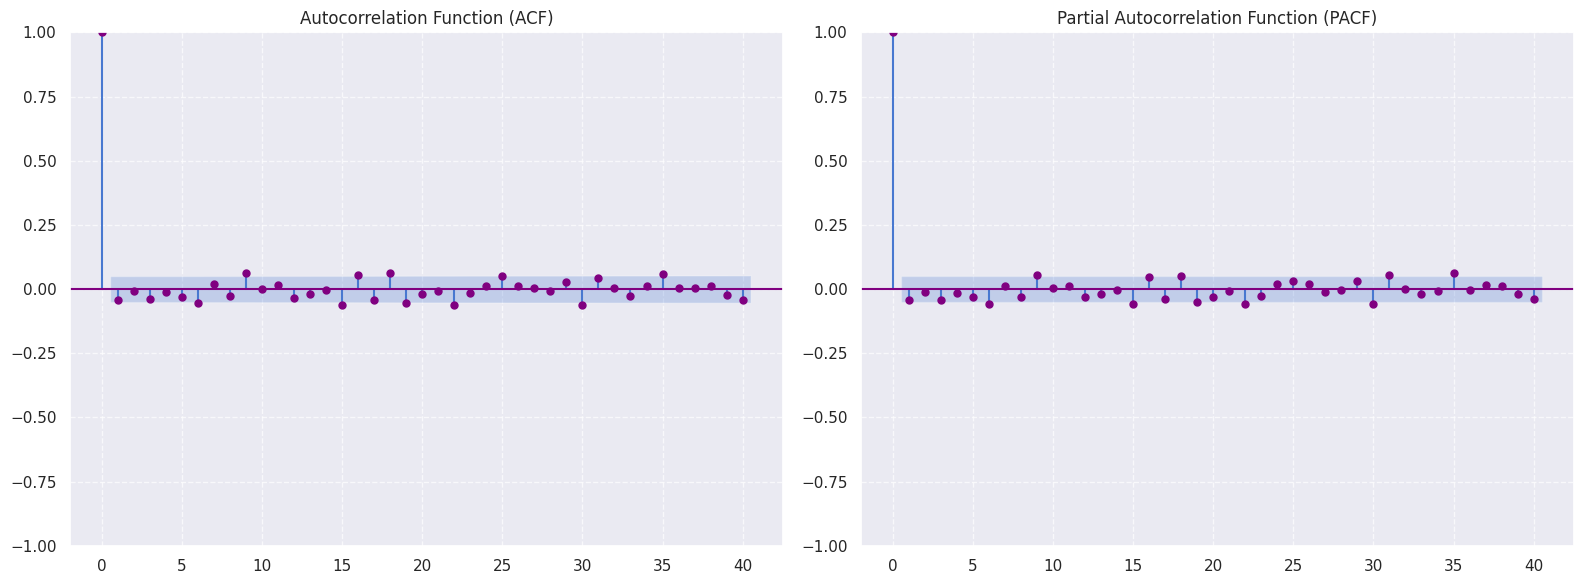

=== ARIMA Modeling ===
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9412.053, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6637.544, Time=2.94 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8138.300, Time=6.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9430.358, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7080.708, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6472.588, Time=8.05 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=6414.751, Time=23.42 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=50.93 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=27.77 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=9380.805, Time=15.26 sec
 ARIMA(2,0,0)(3,1,0)[12] intercept   : AIC=6414.788, Time=29.60 sec
 ARIMA(1,0,1)(3,1,0)[12] intercept   : AIC=6414.820, Time=24.19 sec
 ARIMA(0,0,1)(3,1,0)[12] intercept   : AIC=8136.604, Time=21.56 sec
 ARIMA(2,0,1)(3,1,0)[12] intercept   : AIC=6416.382, Time=47.33 se

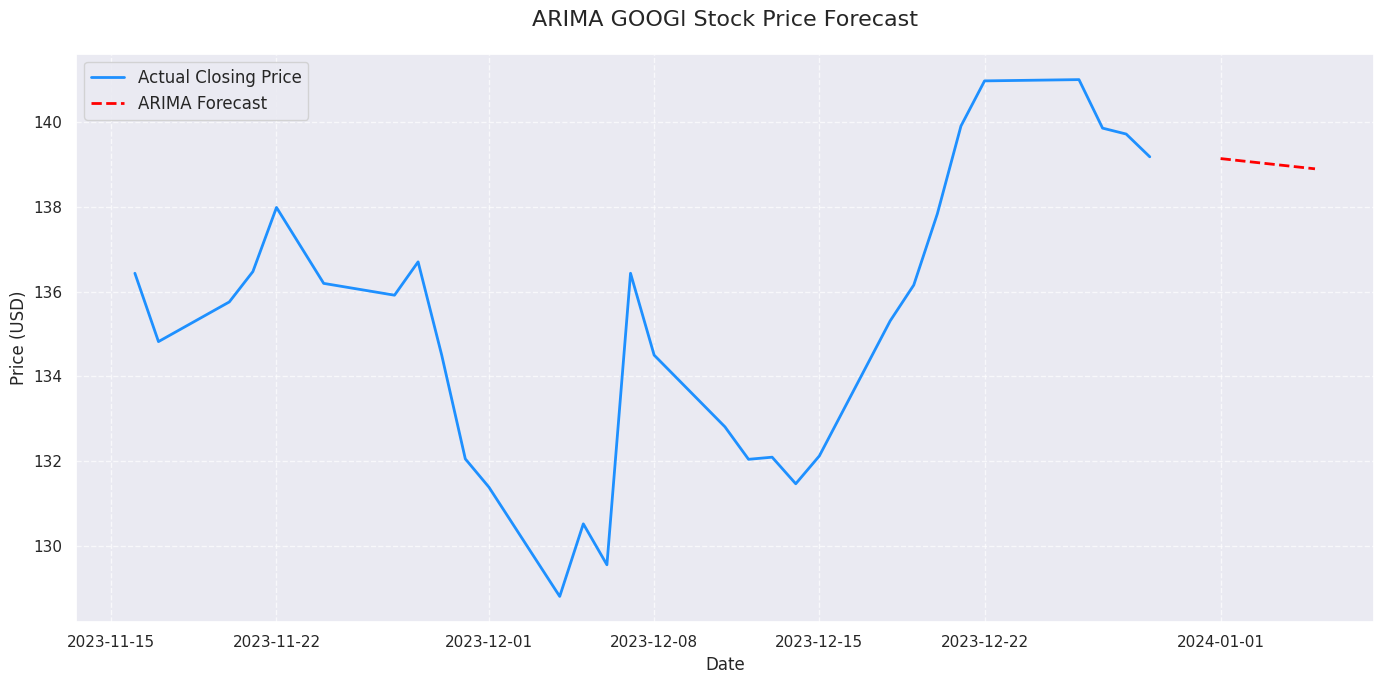


ARIMA Performance Metrics:
RMSE: 1.30, MAE: 1.13, MAPE: 0.80%



=== LSTM Modeling ===
Training LSTM (this may take a few minutes)...
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1481 - val_loss: 0.0050
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - val_loss: 0.0027
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0078 - val_loss: 0.0026
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0079 - val_loss: 0.0021
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0078 - val_loss: 0.0020
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 11/20
34

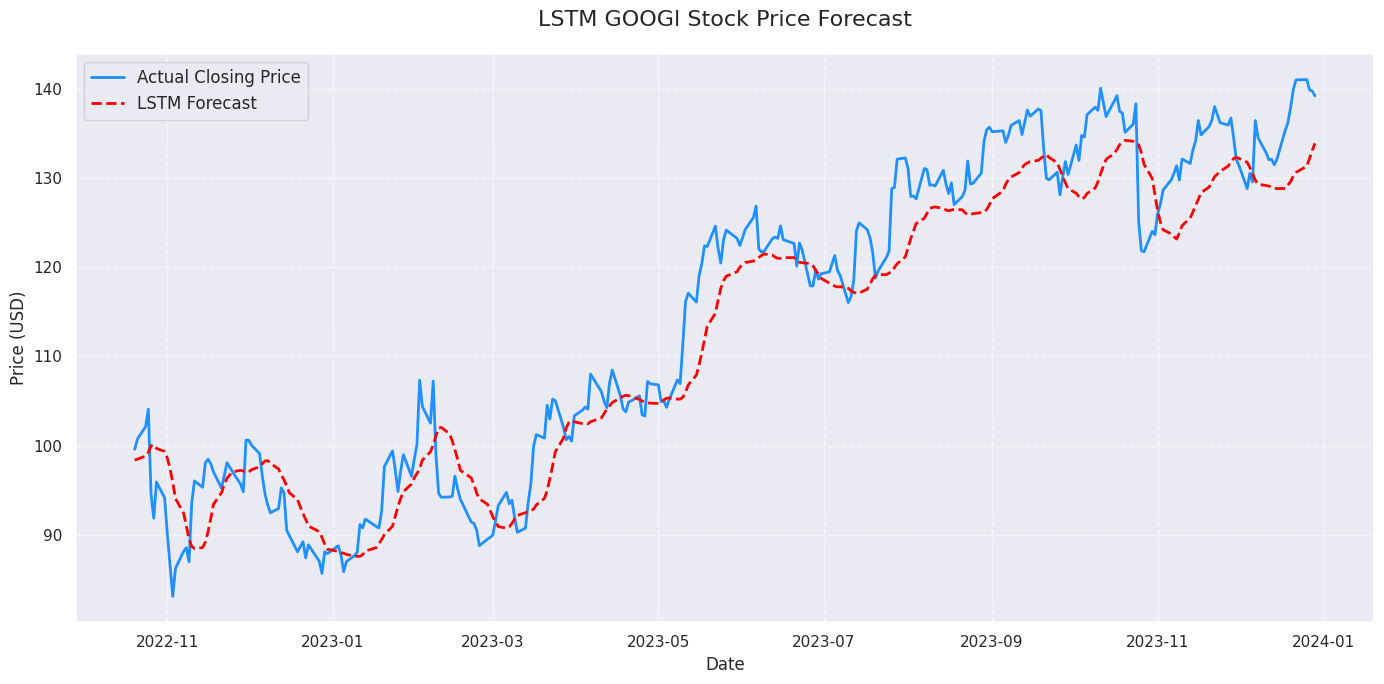

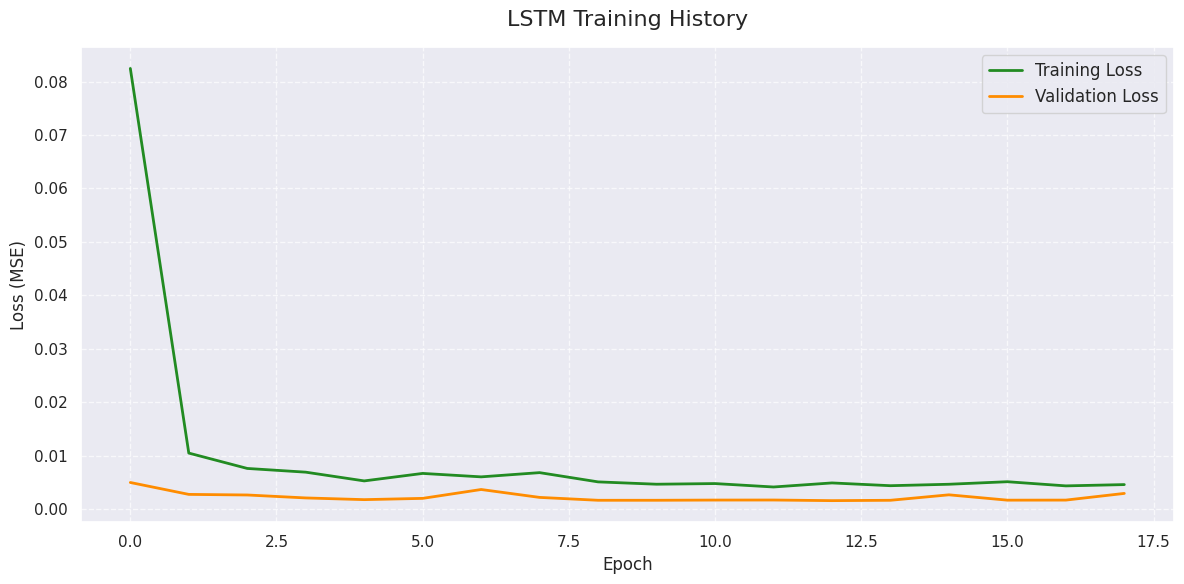

=== Model Comparison ===

ARIMA Performance Metrics:
RMSE: 1.30, MAE: 1.13, MAPE: 0.80%

LSTM Performance Metrics:
RMSE: 5.07, MAE: 4.18, MAPE: 3.65%





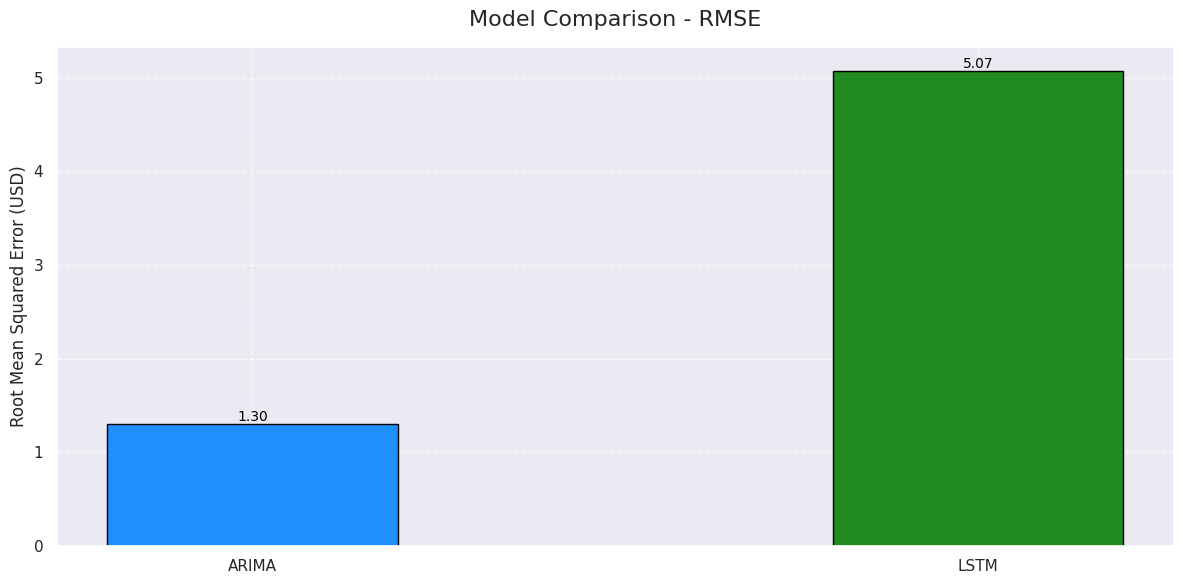

Predictions saved to Google Drive as 'stock_predictions.csv'



Stock Prediction Metrics:
Ticker: GOOGl
ARIMA - RMSE: 1.2993283108502152, MAE: 1.129116407381258, MAPE: 0.8032930598028062
LSTM - RMSE: 5.074399656411526, MAE: 4.176689885457357, MAPE: 3.65137565461092



In [5]:
# Load and preprocess stock data with fallback
ticker = 'GOOGl'
start_date = '2018-01-01'
end_date = '2023-12-31'

df = get_stock_data(ticker, start_date, end_date)
if df is None:
    print("Falling back to a default ticker (e.g., AAPL) due to repeated failures.")
    df = get_stock_data('AAPL', start_date, end_date)  # Fallback to Apple
    if df is None:
        raise ValueError("Failed to load stock data for any ticker. Please check your internet connection or try later.")

print("Columns in dataset:", df.columns)
print("\n" * 2)  # Add vertical spacing after text output

# Exploratory Data Analysis (EDA) - Visually Pleasing
print("=== Exploratory Data Analysis ===")
time.sleep(1)  # Pause for readability
plt.figure(figsize=(14, 7))  # Larger figure for better visibility
plt.plot(df.index, df['Close'], label='Closing Price', color='dodgerblue', linewidth=2)
plt.title(f'{ticker} Stock Price (Close) Over Time', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/stock_price_trend.png')
plt.show()
time.sleep(1)  # Add delay to separate plots

# Calculate and display basic statistics with spacing
print("\nDescriptive Statistics for Closing Price:\n")
print(df['Close'].describe())
print("\n" * 2)

# Check and display missing values
print("\nMissing Values in Dataset:\n")
print(df.isnull().sum())
print("\n" * 2)

# Plot price distribution with enhanced styling
print("=== Price Distribution ===")
time.sleep(1)
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='forestgreen', edgecolor='black')
plt.title(f'Distribution of {ticker} Closing Prices', fontsize=16, pad=15)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/stock_price_distribution.png')
plt.show()
time.sleep(1)

# Check stationarity for ARIMA with enhanced visualization
print("=== Differenced Price for Stationarity ===")
time.sleep(1)
df_diff = df['Close'].diff().dropna()
plt.figure(figsize=(14, 7))
plt.plot(df_diff.index, df_diff, label='Differenced Closing Price', color='darkorange', linewidth=2)
plt.title('Differenced Stock Price for Stationarity', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Difference', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/differenced_price.png')
plt.show()
time.sleep(1)

# Plot ACF and PACF with enhanced styling
print("=== Autocorrelation and Partial Autocorrelation ===")
time.sleep(1)
plt.figure(figsize=(16, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=40, color='purple', title='Autocorrelation Function (ACF)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=40, color='purple', title='Partial Autocorrelation Function (PACF)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/acf_pacf.png')
plt.show()
time.sleep(1)

# ARIMA Model with Auto-Tuning
print("=== ARIMA Modeling ===")
time.sleep(1)
try:
    # Use auto_arima to find optimal (p,d,q)
    model_auto = auto_arima(df['Close'], start_p=0, start_q=0, max_p=3, max_q=3,
                           start_P=0, start_Q=0, max_P=3, max_Q=3, m=12,
                           seasonal=True, d=None, D=1, trace=True, error_action='ignore',
                           suppress_warnings=True, stepwise=True)
    print("\nAuto-ARIMA Best Order:", model_auto.order)
    print("\n" * 2)

    # Fit ARIMA with optimal parameters
    model_arima = ARIMA(df['Close'], order=model_auto.order)
    results_arima = model_arima.fit()
    print("\nARIMA Summary:\n")
    print(results_arima.summary())
    print("\n" * 2)

    # Forecast next 5 days
    forecast_arima = results_arima.forecast(steps=5)
    print("\nARIMA Forecast for next 5 days:\n", forecast_arima)
    print("\n" * 2)

    # Plot ARIMA forecast with enhanced styling
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-30:], df['Close'][-30:], label='Actual Closing Price', color='dodgerblue', linewidth=2)
    plt.plot(pd.date_range(start=df.index[-1], periods=6, freq='B')[1:], forecast_arima, label='ARIMA Forecast', color='red', linewidth=2, linestyle='--')
    plt.title(f'ARIMA {ticker} Stock Price Forecast', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='upper left')
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/arima_forecast.png')
    plt.show()
    time.sleep(1)

    # Calculate ARIMA errors
    if len(df) > 5:
        actual_last_5 = df['Close'][-5:]
        arima_rmse = np.sqrt(mean_squared_error(actual_last_5, forecast_arima[:5]))
        arima_mae = mean_absolute_error(actual_last_5, forecast_arima[:5])
        arima_mape = mean_absolute_percentage_error(actual_last_5, forecast_arima[:5]) * 100
        print(f"\nARIMA Performance Metrics:")
        print(f"RMSE: {arima_rmse:.2f}, MAE: {arima_mae:.2f}, MAPE: {arima_mape:.2f}%")
        print("\n" * 2)
except Exception as e:
    print(f"Error with ARIMA: {e}")
    print("\n" * 2)

# LSTM Model
print("=== LSTM Modeling ===")
time.sleep(1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences for LSTM (10 days to predict 1 day)
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # Only predict Close price
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train LSTM with enhanced styling feedback
try:
    model_lstm = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(25, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train LSTM with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    print("Training LSTM (this may take a few minutes)...")
    history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32,
                            validation_split=0.1, verbose=1, callbacks=[early_stopping])
    print("\nLSTM Training Complete.")
    print("\n" * 2)

    # Predict
    y_pred_lstm = model_lstm.predict(X_test, batch_size=32)
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
    y_test_inv = scaler.inverse_transform([y_test])

    # Calculate errors
    lstm_rmse = np.sqrt(mean_squared_error(y_test_inv.T, y_pred_lstm))
    lstm_mae = mean_absolute_error(y_test_inv.T, y_pred_lstm)
    lstm_mape = mean_absolute_percentage_error(y_test_inv.T, y_pred_lstm) * 100
    print(f"\nLSTM Performance Metrics:")
    print(f"RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}, MAPE: {lstm_mape:.2f}%")
    print("\n" * 2)

    # Plot LSTM forecast with enhanced styling
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test):], y_test_inv.T, label='Actual Closing Price', color='dodgerblue', linewidth=2)
    plt.plot(df.index[-len(y_pred_lstm):], y_pred_lstm, label='LSTM Forecast', color='red', linewidth=2, linestyle='--')
    plt.title(f'LSTM {ticker} Stock Price Forecast', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='upper left')
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/lstm_forecast.png')
    plt.show()
    time.sleep(1)

    # Plot training history with enhanced styling
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='forestgreen', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange', linewidth=2)
    plt.title('LSTM Training History', fontsize=16, pad=15)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/lstm_training_history.png')
    plt.show()
    time.sleep(1)
except Exception as e:
    print(f"Error with LSTM: {e}")
    print("\n" * 2)

# Compare Models with enhanced styling
print("=== Model Comparison ===")
time.sleep(1)
if 'arima_rmse' in locals() and 'lstm_rmse' in locals():
    errors = {
        'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
        'LSTM': {'RMSE': lstm_rmse, 'MAE': lstm_mae, 'MAPE': lstm_mape}
    }
    for model, metrics in errors.items():
        print(f"\n{model} Performance Metrics:")
        print(f"RMSE: {metrics['RMSE']:.2f}, MAE: {metrics['MAE']:.2f}, MAPE: {metrics['MAPE']:.2f}%")
    print("\n" * 2)

    # Visualize model comparison with enhanced styling
    plt.figure(figsize=(12, 6))
    models = list(errors.keys())
    rmse_values = [errors[model]['RMSE'] for model in models]
    bars = plt.bar(models, rmse_values, color=['dodgerblue', 'forestgreen'], edgecolor='black', width=0.4)
    plt.title('Model Comparison - RMSE', fontsize=16, pad=15)
    plt.ylabel('Root Mean Squared Error (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=10, color='black')
    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/model_comparison.png')
    plt.show()
    time.sleep(1)

# Save predictions for analysis
predictions_df = pd.DataFrame({
    'Date': df.index[-len(y_test):],
    'Actual_Price': y_test_inv.T.flatten(),
    'LSTM_Prediction': y_pred_lstm.flatten(),
    'ARIMA_Prediction': [np.nan] * (len(y_test) - 5) + forecast_arima[:5].tolist()
})
predictions_df.to_csv('/content/drive/My Drive/stock_predictions.csv', index=False)
print("Predictions saved to Google Drive as 'stock_predictions.csv'")
print("\n" * 2)

report = """Stock Prediction Metrics:
Ticker: {ticker}
ARIMA - RMSE: {arima_rmse}, MAE: {arima_mae}, MAPE: {arima_mape}
LSTM - RMSE: {lstm_rmse}, MAE: {lstm_mae}, MAPE: {lstm_mape}
""".format(
    ticker=ticker,
    arima_rmse=arima_rmse if 'arima_rmse' in locals() else 'N/A',
    arima_mae=arima_mae if 'arima_mae' in locals() else 'N/A',
    arima_mape=arima_mape if 'arima_mape' in locals() else 'N/A',
    lstm_rmse=lstm_rmse if 'lstm_rmse' in locals() else 'N/A',
    lstm_mae=lstm_mae if 'lstm_mae' in locals() else 'N/A',
    lstm_mape=lstm_mape if 'lstm_mape' in locals() else 'N/A'
)

print(report)
